In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Lynda/Desktop/Concevez une application au service de la santé publique_HADJEMI_Lynda/fr.openfoodfacts.org.products.csv",'\t')
data = df.copy()

C:\Users\Lynda\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Lynda\AppData\Local\Temp\ipykernel_10648\3954343470.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Lynda/Desktop/Concevez une application au service de la santé publique_HADJEMI_Lynda/fr.openfoodfacts.org.products.csv",'\t')


In [3]:
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


In [4]:
data.shape

(320772, 162)

In [5]:
print(list(data.columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [6]:
data['product_name'].nunique()

221347

In [7]:
data['categories'].nunique()

36982

In [8]:
categories = data['categories'].unique()
categories[0:500]

array([nan, 'Filet de bœuf', 'Légumes-feuilles',
       'Snacks sucrés,Biscuits et gâteaux,Pâtisseries',
       'Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Breads',
       'Boulange',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes",
       'Root bier', 'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés',
       'Quiches lorraines', 'Poulets cuisinés', 'Bonbons',
       "Aliments et boissons à base de végétaux,Boissons,Aliments d'origine végétale,Boissons chaudes,Infusions,Thés,Thés noirs,Boissons non sucrées,Thés noirs aromatisés,Thés aromatisés",
       'Sirops,Sirops pour ganache', 'Chicken feet', 'Pralinen',
       'Desserts,Christmas Puddings,Puddings',
       'Sugary snacks,Desserts,Biscuits and cakes,Cakes,Christmas Puddings,Puddings',
       'Sodas au cola',
       'Plant-based foods and beverages,

In [9]:
# transformer la valeur energy en float:
data= data.astype({'energy_100g' : 'float'})

In [10]:
#print(list(data['countries']))
#data.countries.unique().tolist()
data['countries'].unique().tolist()


['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

In [11]:
data['countries'].nunique()

1434

In [12]:
liste = list(data['countries'].unique())

In [13]:
liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']

In [14]:
data = data[data['countries'].isin(liste_pays)]

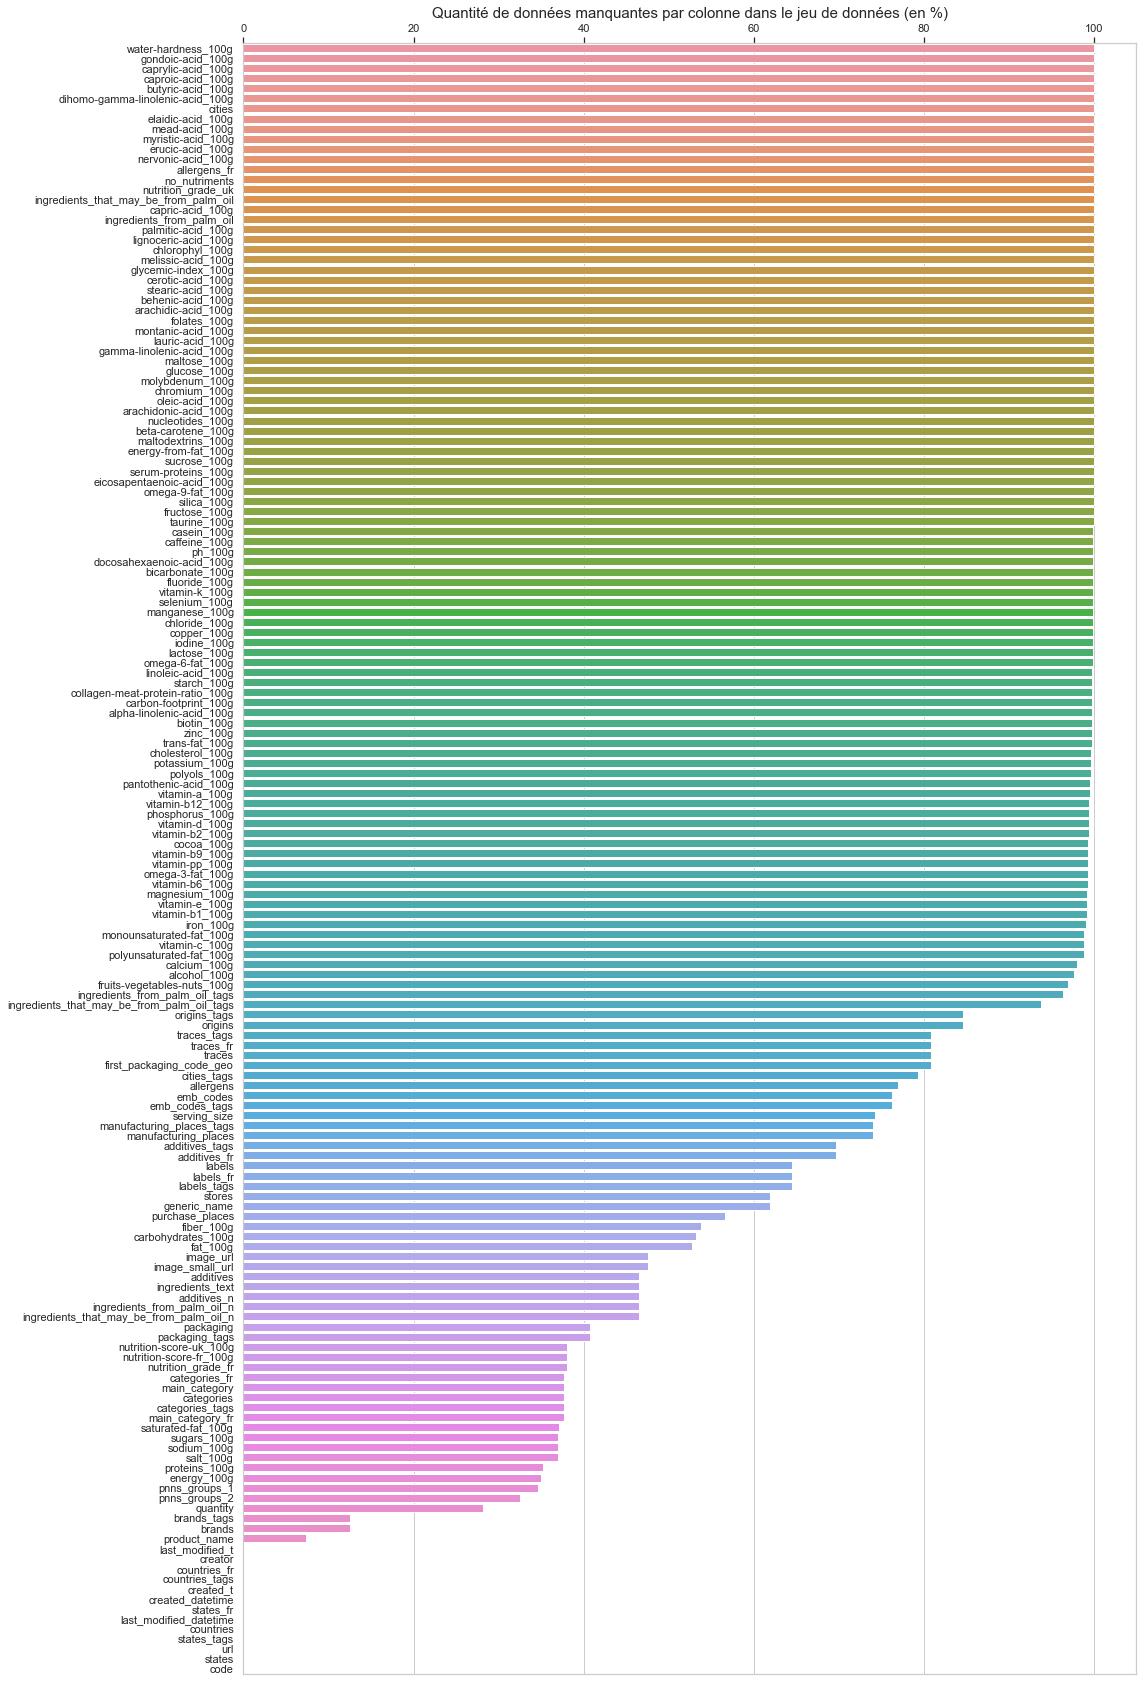

In [15]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [16]:
(data.isna().sum()/data.shape[0]).sort_values(ascending = False)

water-hardness_100g    1.0
gondoic-acid_100g      1.0
caprylic-acid_100g     1.0
caproic-acid_100g      1.0
butyric-acid_100g      1.0
                      ... 
countries              0.0
states_tags            0.0
url                    0.0
states                 0.0
code                   0.0
Length: 162, dtype: float64

In [17]:
# Filtrer le jeu de données pour des valeurs manquantes supérieur à 80%
data = data[data.columns[data.isna().sum()/data.shape[0] < 0.8]]


In [18]:
duplicates = data.duplicated(subset=['code'],keep = False)

if True in list(duplicates.unique()):
    result = len(data[duplicates])
    print(f'il ya {result}  données dupliquées')
else : 
    print('y on a pas des données dupliquées')


il ya 2  données dupliquées


In [19]:
# Suppression des données dupliquées : 
data = data.drop_duplicates(subset= ['code'],keep  =False)
data.shape

(94483, 60)

In [20]:
liste_100 = [col for col in data.columns if '_100' in col]
liste_100.append('product_name')

In [21]:
mycolumns=['code','product_name',
           'additives_n', 'ingredients_from_palm_oil_n',
           'nutrition_grade_fr', 'pnns_groups_1','pnns_groups_2']


In [22]:
#je fais la concatinations des deux listes:
liste_finale = liste_100 + mycolumns
#liste_finale

In [23]:
# Filtrage de dataset
datafinal = data[liste_finale]
datafinal

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,product_name,code,product_name,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Farine de blé noir,3087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27205,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twix x2,39259,Twix x2,NaN,NaN,NaN,unknown,unknown
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lentilles vertes,5200016,lentilles vertes,0.0,0.0,NaN,Cereals and potatoes,Legumes
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7020254,NaN,NaN,NaN,NaN,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roussette du Bugey (2011),9906410000009,Roussette du Bugey (2011),NaN,NaN,NaN,NaN,Alcoholic beverages
320763,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,0.01,2.0,0.0,Thé vert Earl grey,99111250,Thé vert Earl grey,0.0,0.0,c,Beverages,Non-sugared beverages
320764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cheese cake thé vert, yuzu",9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN
320765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rillette d'oie,9935010000003,Rillette d'oie,0.0,0.0,NaN,Fish Meat Eggs,Processed meat


In [24]:
datafinal.shape

(94483, 19)

In [25]:
data_final1 = datafinal.copy

In [26]:
datafinal['nutrition-score-uk_100g'].unique()
datafinal['nutrition-score-fr_100g'].unique()

array([ nan,  14.,  13.,  15.,  12.,  22.,   6.,   1.,  11.,  19.,  18.,
         4.,   2.,  -3.,   5.,  16.,  24.,  21.,  20.,   8.,  23.,   3.,
        -2.,  -1.,  -5.,   9.,  10.,  -4.,  -6.,   0.,  29.,  35.,  27.,
        26.,  25.,  28.,   7.,  17.,  -9.,  36.,  32., -10.,  -8.,  30.,
        -7.,  33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

#### on supprime la colonnes "nutrition-score-uk_100g 

In [27]:
datafinal.drop(columns = ['nutrition-score-uk_100g'],axis = 1,inplace = True)

C:\Users\Lynda\AppData\Local\Temp\ipykernel_10648\1643374599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal.drop(columns = ['nutrition-score-uk_100g'],axis = 1,inplace = True)


In [28]:
datafinal.shape

(94483, 18)

In [29]:
datafinal['nutrition_grade_fr'].unique()

array([nan, 'd', 'e', 'c', 'b', 'a'], dtype=object)

In [30]:
nutrigrades = datafinal.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)
nutrigrades

nutrition_grade_fr
d    16177
c    12633
e    11073
a     9808
b     8837
Name: code, dtype: int64

In [31]:
nutrigrades.index

Index(['d', 'c', 'e', 'a', 'b'], dtype='object', name='nutrition_grade_fr')

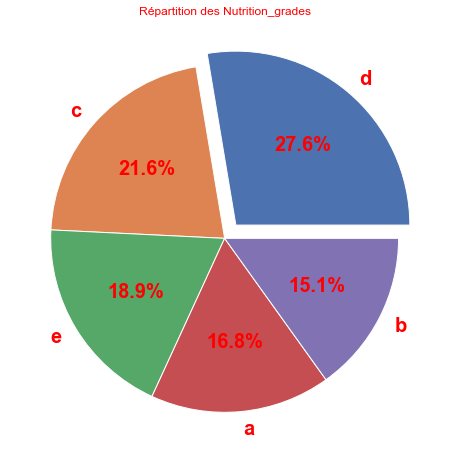

In [32]:
nutrigrades = datafinal.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8))

explodes = np.zeros(5)
explodes[0] = .1
plt.pie(nutrigrades, 
        labels=nutrigrades.index, 
        startangle=0,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="red",size=20, weight="bold"))
plt.title("Répartition des Nutrition_grades",color="red")
plt.show()

In [33]:
datafinal['nutrition-score-fr_100g'].unique()

array([ nan,  14.,  13.,  15.,  12.,  22.,   6.,   1.,  11.,  19.,  18.,
         4.,   2.,  -3.,   5.,  16.,  24.,  21.,  20.,   8.,  23.,   3.,
        -2.,  -1.,  -5.,   9.,  10.,  -4.,  -6.,   0.,  29.,  35.,  27.,
        26.,  25.,  28.,   7.,  17.,  -9.,  36.,  32., -10.,  -8.,  30.,
        -7.,  33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

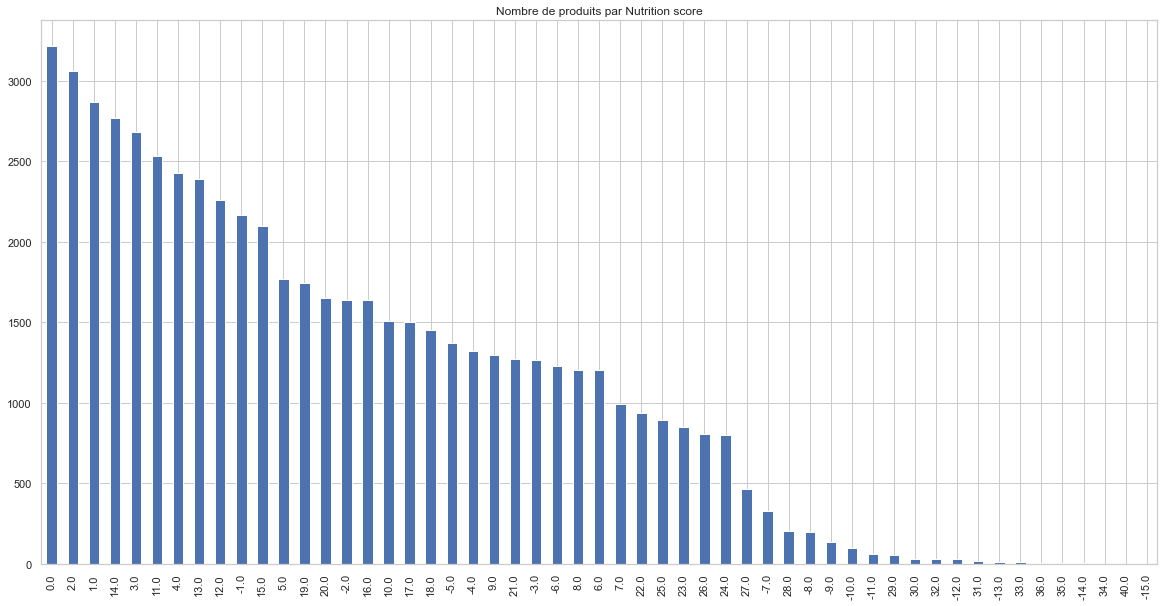

In [34]:
plt.figure(figsize=(20,10))
datafinal['nutrition-score-fr_100g'].value_counts().plot(kind='bar')
plt.title("Nombre de produits par Nutrition score")
plt.show()

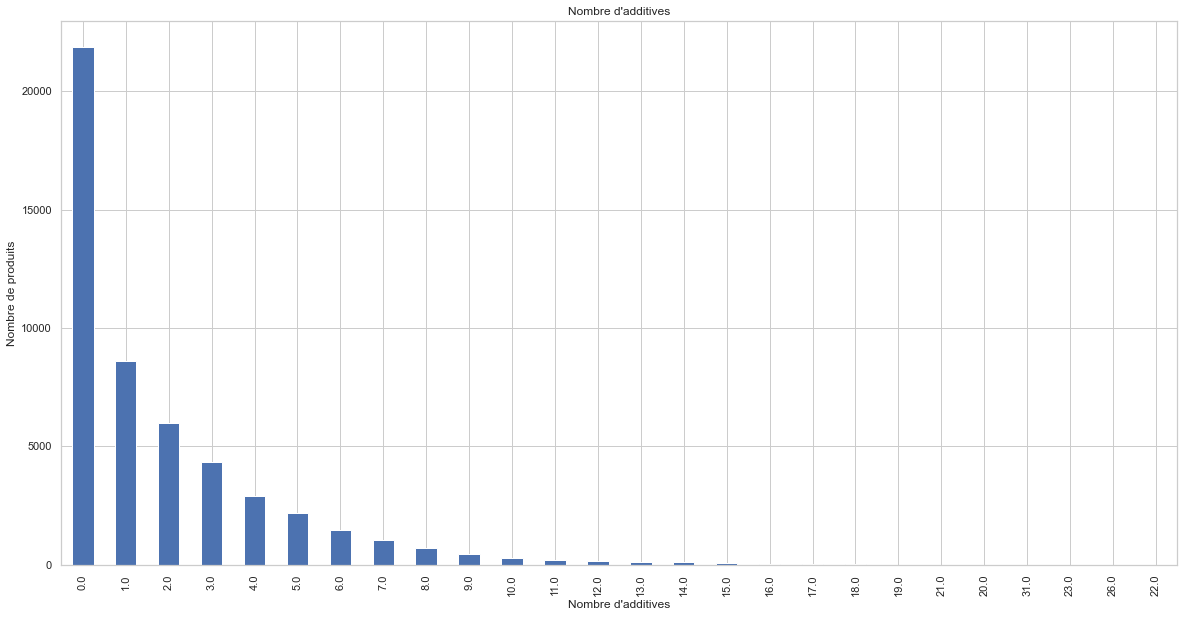

In [35]:
# on regarde le nombes d'additives dans cahque produit:
plt.figure(figsize=(20,10))
datafinal['additives_n'].value_counts().plot(kind='bar')
plt.title("Nombre d'additives")
plt.xlabel("Nombre d'additives")
plt.ylabel("Nombre de produits")
plt.show()


#### je séléctionne les variables catégoriels seul et varaibles numerique seuls

In [36]:
variable_num = datafinal.select_dtypes('float')
variable_string = datafinal.select_dtypes('object')

### la moyenne des données avant le nettoyages

In [37]:
datafinal.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n
count,6.146800e+04,44626.000000,59418.000000,44212.000000,59515.000000,43665.000000,61219.000000,59574.000000,59571.000000,58528.000000,50553.000000,50553.000000
mean,1.167941e+03,13.275043,5.385418,27.306064,13.235392,2.522458,7.792804,1.160853,0.457050,8.601165,1.856151,0.067909
std,1.315690e+04,16.988729,8.537914,27.305918,19.027931,4.633169,7.929396,4.290308,1.689078,9.017775,2.567763,0.255416
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,4.268750e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000,0.000000
50%,1.027000e+03,6.800000,1.900000,14.000000,4.000000,1.300000,6.000000,0.570000,0.224409,8.000000,1.000000,0.000000
75%,1.640000e+03,21.000000,7.300000,52.700000,17.000000,3.200000,11.000000,1.250000,0.492126,15.000000,3.000000,0.000000
max,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000,31.000000,2.000000


Text(0.5, 1.0, "Nombre d'additifs")

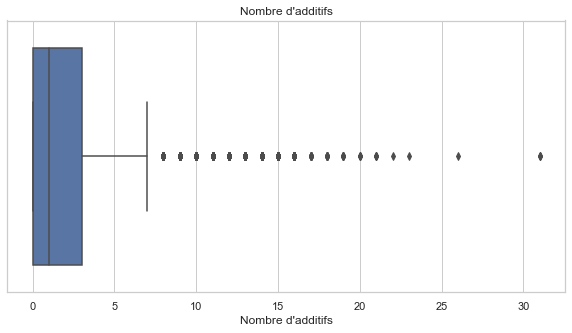

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x=datafinal['additives_n'])
plt.xlabel("Nombre d'additifs")
plt.title("Nombre d'additifs")

#### Visualisation des données par les boxplot:

Text(0.5, 1.0, 'Nutrition score')

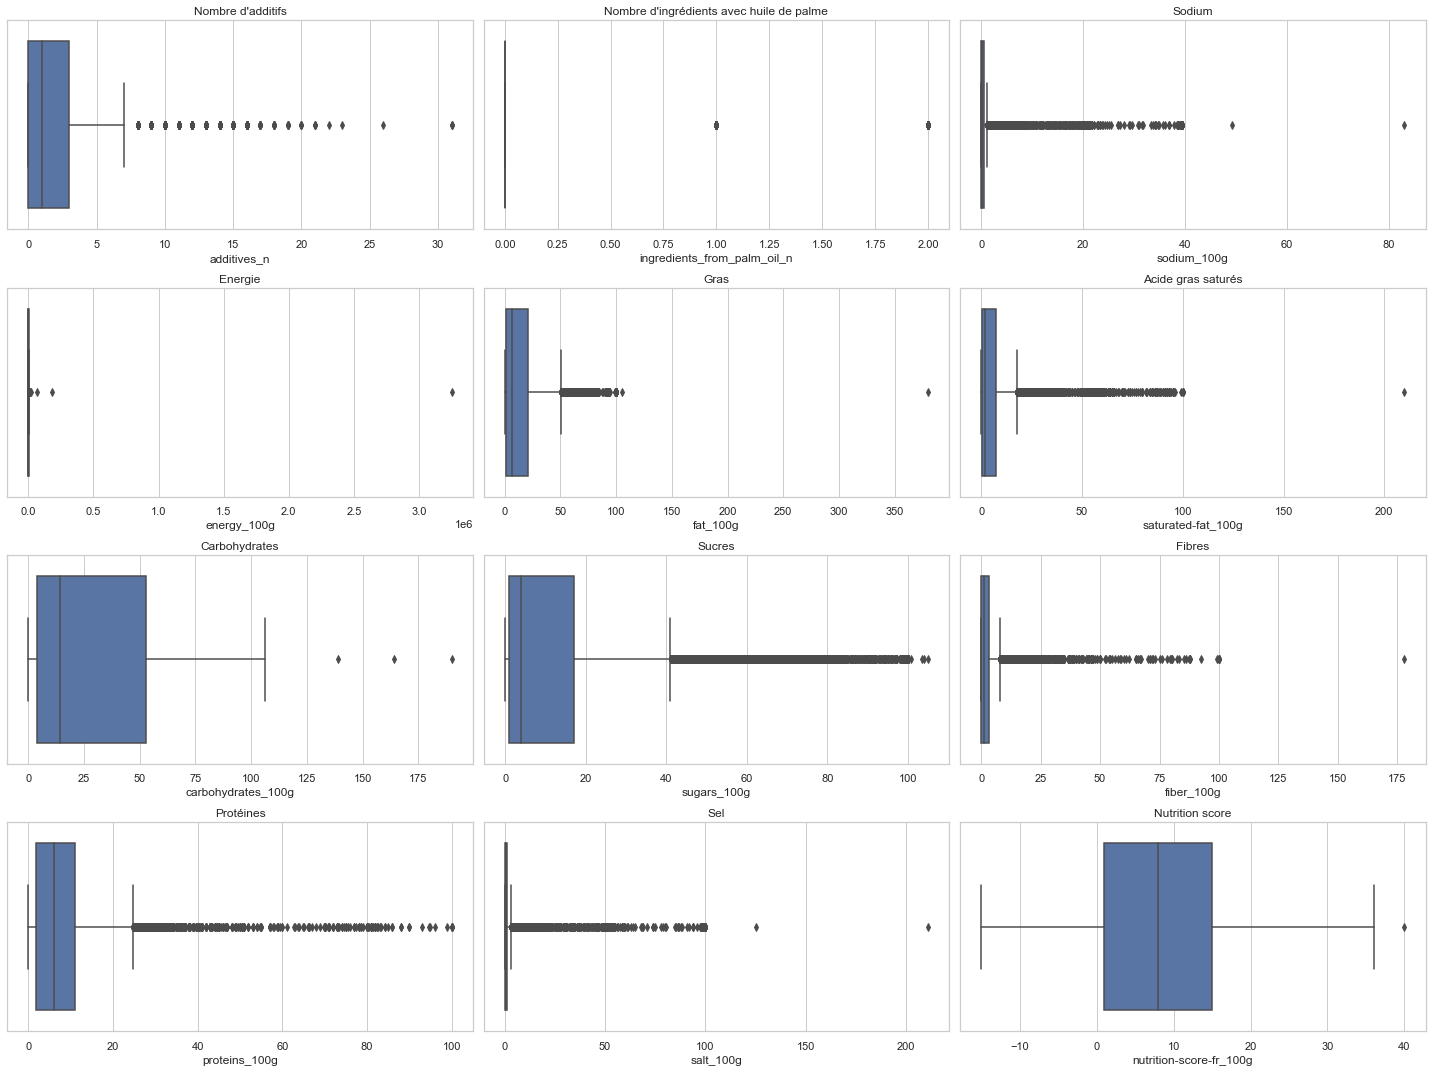

In [39]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],x=datafinal['additives_n'])
axs[0,0].set_title("Nombre d'additifs")
sns.boxplot(ax=axs[0,1],x=datafinal['ingredients_from_palm_oil_n'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.boxplot(ax=axs[0,2],x=datafinal['sodium_100g'])
axs[0,2].set_title("Sodium")
sns.boxplot(ax=axs[1,0],x=datafinal['energy_100g'])
axs[1,0].set_title("Energie")
sns.boxplot(ax=axs[1,1],x=datafinal['fat_100g'])
axs[1,1].set_title("Gras")
sns.boxplot(ax=axs[1,2],x=datafinal['saturated-fat_100g'])
axs[1,2].set_title("Acide gras saturés")
sns.boxplot(ax=axs[2,0],x=datafinal['carbohydrates_100g'])
axs[2,0].set_title("Carbohydrates")
sns.boxplot(ax=axs[2,1],x=datafinal['sugars_100g'])
axs[2,1].set_title("Sucres")
sns.boxplot(ax=axs[2,2],x=datafinal['fiber_100g'])
axs[2,2].set_title("Fibres")
sns.boxplot(ax=axs[3,0],x=datafinal['proteins_100g'])
axs[3,0].set_title("Protéines")
sns.boxplot(ax=axs[3,1],x=datafinal['salt_100g'])
axs[3,1].set_title("Sel")
sns.boxplot(ax=axs[3,2],x=datafinal['nutrition-score-fr_100g'])
axs[3,2].set_title("Nutrition score")


### visualisation des données par scatterplot:

Text(0.5, 1.0, 'sodium_100g Distribution')

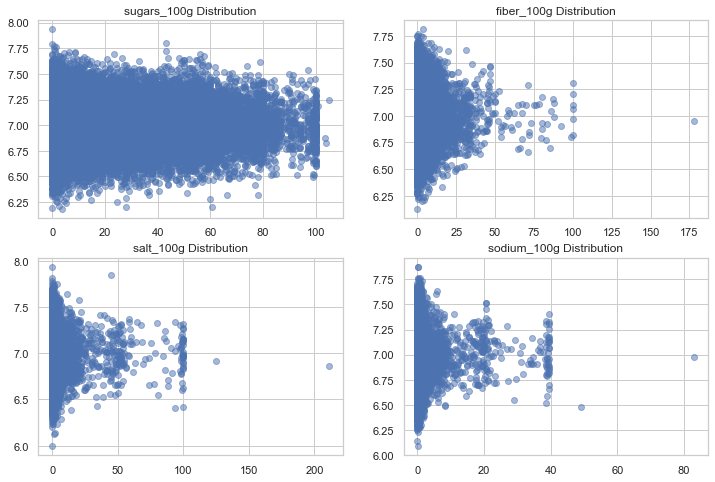

In [40]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(datafinal['sugars_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("sugars_100g Distribution")

plt.subplot(2, 2, 2)
plt.scatter(datafinal['fiber_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("fiber_100g Distribution")

plt.subplot(2, 2, 3)
plt.scatter(datafinal['salt_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("salt_100g Distribution")

plt.subplot(2, 2, 4)
plt.scatter(datafinal['sodium_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("sodium_100g Distribution")



Text(0.5, 1.0, 'proteines_100g Distribution')

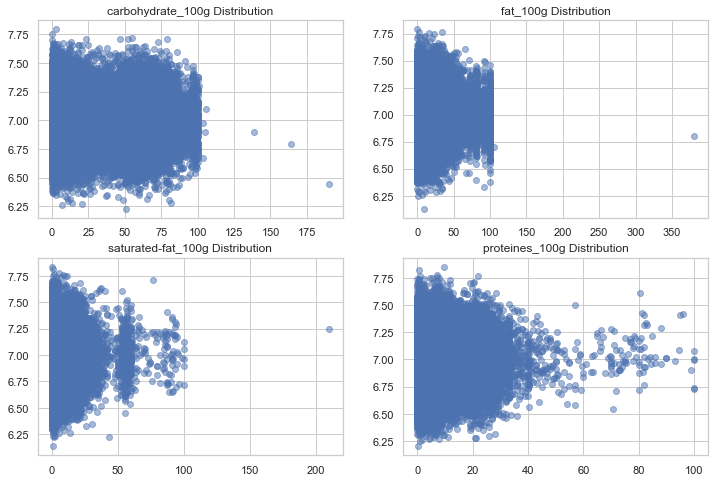

In [41]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(datafinal['carbohydrates_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("carbohydrate_100g Distribution")


plt.subplot(2, 2, 2)
plt.scatter(datafinal['fat_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("fat_100g Distribution")

plt.subplot(2, 2, 3)
plt.scatter(datafinal['saturated-fat_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("saturated-fat_100g Distribution")

plt.subplot(2, 2, 4)
plt.scatter(datafinal['proteins_100g'], np.random.normal(7, 0.2, size=datafinal.shape[0]), alpha=0.5)
plt.title("proteines_100g Distribution")

#### Suppression des valeurs aberantes pour les nuttriments:
* premiere approche:

* Les valeurs suffixxées avec _100  nous indique la quantité de nutriment pour 100g de produit,
les valeurs renseigné ne doivent donc pas dépasser les 100g,nous allons donc supprimer les lignes dans les valeurs de nuttriments > au sieul

In [42]:
data2 = datafinal.copy()

In [43]:
data2.shape

(94483, 18)

In [44]:
g_per_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']
       

In [45]:
# supprimer les lignes de nuttriments qui sont supprieur au sieul:
df1 = data2[~((data2[g_per_100g]> 100)|(data2[g_per_100g]< 0)).any(axis = 1)]

* D'autre part la variable saturated-fat-100g ne doit pas etre superieur a la valeurs de fat-100g, de meme pour les variable sodium ne doit pas etre superieur au salt-100g , et celui de sucre et carbohydrate
* Nous allons donc supprimer les lignes qui remplissent ces condition:

In [46]:
df1 = df1[(~(df1['saturated-fat_100g'] > df1['fat_100g']) | (df1['sodium_100g'] > df1['salt_100g'])| (df1['sugars_100g'] > df1['carbohydrates_100g']))]


#### methode de quantille:
cette methode fonctionne bien avec la moyenne et ecapt types tres extreme , la cas de l'energie.
avec d'autre variables de 40 a 100g par exemple cette methode ne donne pas une efficacité,ça risque de ecarter les variables.

In [47]:
print(f' la moyenne est : {df1.energy_100g.mean()}')
print(f' lecat type est  : {df1.energy_100g.std()}')
print(f' la mediane est  : {df1.energy_100g.median()}')

 la moyenne est : 1167.7807869744406
 lecat type est  : 13165.354332432813
 la mediane est  : 1027.0


In [48]:
df1['energy_100g'].quantile([0.25,0.5,0.75,0.995])

0.250     427.0
0.500    1027.0
0.750    1640.0
0.995    3700.0
Name: energy_100g, dtype: float64

In [49]:
df1['energy_100g']= df1['energy_100g'].where(df1['energy_100g']<df1['energy_100g'].quantile(0.995))

In [50]:
df1.shape

(94402, 18)

In [51]:
datafinal.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'product_name', 'code',
       'product_name', 'additives_n', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2'],
      dtype='object')

#### Méthode 2 : pour trater les valeurs abérantes:(seble a la prmiere méthode)

### On retire les valeurs supérieures à 100 g et inférieures à 0g pour les features : 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g' et  'salt_100g','sodium_100g

In [52]:
index_num = datafinal[(datafinal['fat_100g'] > 100)|
                       (datafinal['fat_100g'] < 0)|
                       (datafinal['saturated-fat_100g'] > 100)|
                       (datafinal['saturated-fat_100g'] < 0)|
                       (datafinal['carbohydrates_100g'] > 100)|
                       (datafinal['carbohydrates_100g'] < 0)|
                       (datafinal['sugars_100g'] > 100)|
                       (datafinal['sugars_100g'] < 0)|
                       (datafinal['fiber_100g'] > 100)|
                       (datafinal['fiber_100g'] < 0)|
                       (datafinal['proteins_100g'] > 100)|
                       (datafinal['proteins_100g'] < 0)|
                       (datafinal['sodium_100g'] > 100)|
                       (datafinal['sodium_100g'] < 0)|
                       (datafinal['salt_100g'] > 100)|
                       (datafinal['salt_100g'] < 0)].index
index_num




Int64Index([155609, 195761, 202571, 232239, 233372, 234726, 239347, 245311,
            260599, 298897, 305054, 315621, 317635],
           dtype='int64')

In [53]:

datafinal3 = datafinal.drop(index_num,axis=0)
datafinal3.shape

(94470, 18)

Text(0.5, 1.0, 'Boite à moustache énergie après cleaning')

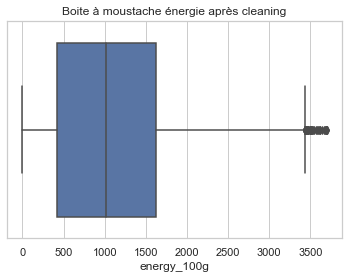

In [54]:
ax = sns.boxplot(x=df1["energy_100g"])
plt.title('Boite à moustache énergie après cleaning')

In [55]:
df1.pnns_groups_1.unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Fruits and vegetables',
       'Composite foods', 'Salty snacks', 'Fat and sauces',
       'Milk and dairy products', 'fruits-and-vegetables',
       'sugary-snacks', 'cereals-and-potatoes'], dtype=object)

In [56]:
df1.pnns_groups_2.unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat', 'Soups',
       'Alcoholic beverages', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Dried fruits',
       'Nuts', 'One-dish meals', 'Cheese', 'Fruits', 'Fats',
       'Pizza pies and quiche', 'Vegetables', 'Breakfast cereals',
       'Cereals', 'Fruit juices', 'vegetables', 'Ice cream',
       'Milk and yogurt', 'Bread', 'Fish and seafood', 'Tripe dishes',
       'pastries', 'Processed meat', 'Dairy desserts',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products', 'fruits', 'legumes',
       'cereals'], dtype=object)

In [57]:
# on trouves des meme categories mais avec des majuscule miniscule les tiret....
# on essaye de les remplacer on gardons qu'un seule categorie
df1.replace(to_replace={'pnns_groups_1':{np.nan:'unknown',
                                          'sugary-snacks':'Sugary snacks',
                                          'cereals-and-potatoes':'Cereals and potatoes',
                                          'fruits-and-vegetables': 'Fruits and vegetables'},
                        'pnns_groups_2':{np.nan:'unknown',
                                        'fruits':'Fruits'}},inplace = True)

In [58]:
print(df1[['pnns_groups_1','pnns_groups_2']].describe())

       pnns_groups_1 pnns_groups_2
count          94402         94402
unique            10            40
top          unknown       unknown
freq           44648         42643


In [59]:
df1[['pnns_groups_1','pnns_groups_2']].value_counts(sort = False)

pnns_groups_1            pnns_groups_2                   
Beverages                Artificially sweetened beverages      185
                         Fruit juices                         1483
                         Fruit nectars                         296
                         Non-sugared beverages                2703
                         Sweetened beverages                  1488
Cereals and potatoes     Bread                                1235
                         Breakfast cereals                     966
                         Cereals                              2887
                         Legumes                               524
                         Potatoes                              101
                         cereals                                 1
                         legumes                                 1
Composite foods          One-dish meals                       4812
                         Pizza pies and quiche                 434
    

In [60]:
# on supprime la categories de produit inconnue:
unknown_group1 = df1.pnns_groups_1 == 'unknown'
unknown_group2 = df1.pnns_groups_2 == 'unknown'
categories = ~(unknown_group1 | unknown_group2)

In [61]:
df1= df1.loc[categories]


In [62]:
# apres la suppression de categorie de produit inconnue et les outliers on arrive à :49754 données
df1.shape

(49754, 18)

In [63]:
df1.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n
count,39827.000000,37970.000000,38428.000000,37579.000000,38492.000000,24775.000000,39925.000000,38540.000000,38538.000000,37780.000000,42156.000000,42156.000000
mean,1061.268691,13.411820,5.288464,26.806212,12.557981,2.562823,7.696183,0.875458,0.344687,8.264399,1.926037,0.066040
std,754.763345,17.362825,8.314216,27.260374,18.367773,3.676729,7.410181,1.467537,0.577822,9.042631,2.610806,0.252335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,389.000000,1.200000,0.260000,3.700000,1.000000,0.300000,1.500000,0.069300,0.027365,1.000000,0.000000,0.000000
50%,971.000000,6.500000,1.800000,13.300000,3.800000,1.600000,6.000000,0.580000,0.228346,8.000000,1.000000,0.000000
75%,1611.000000,21.200000,7.155000,52.400000,15.000000,3.400000,11.000000,1.219200,0.480000,15.000000,3.000000,0.000000
max,3696.000000,100.000000,100.000000,100.000000,100.000000,86.200000,86.000000,74.000000,29.133858,40.000000,31.000000,2.000000


### Corrélation entre les features

In [64]:
data_num = df1.select_dtypes('float')
#variable_string = datafinal.select_dtypes('object')

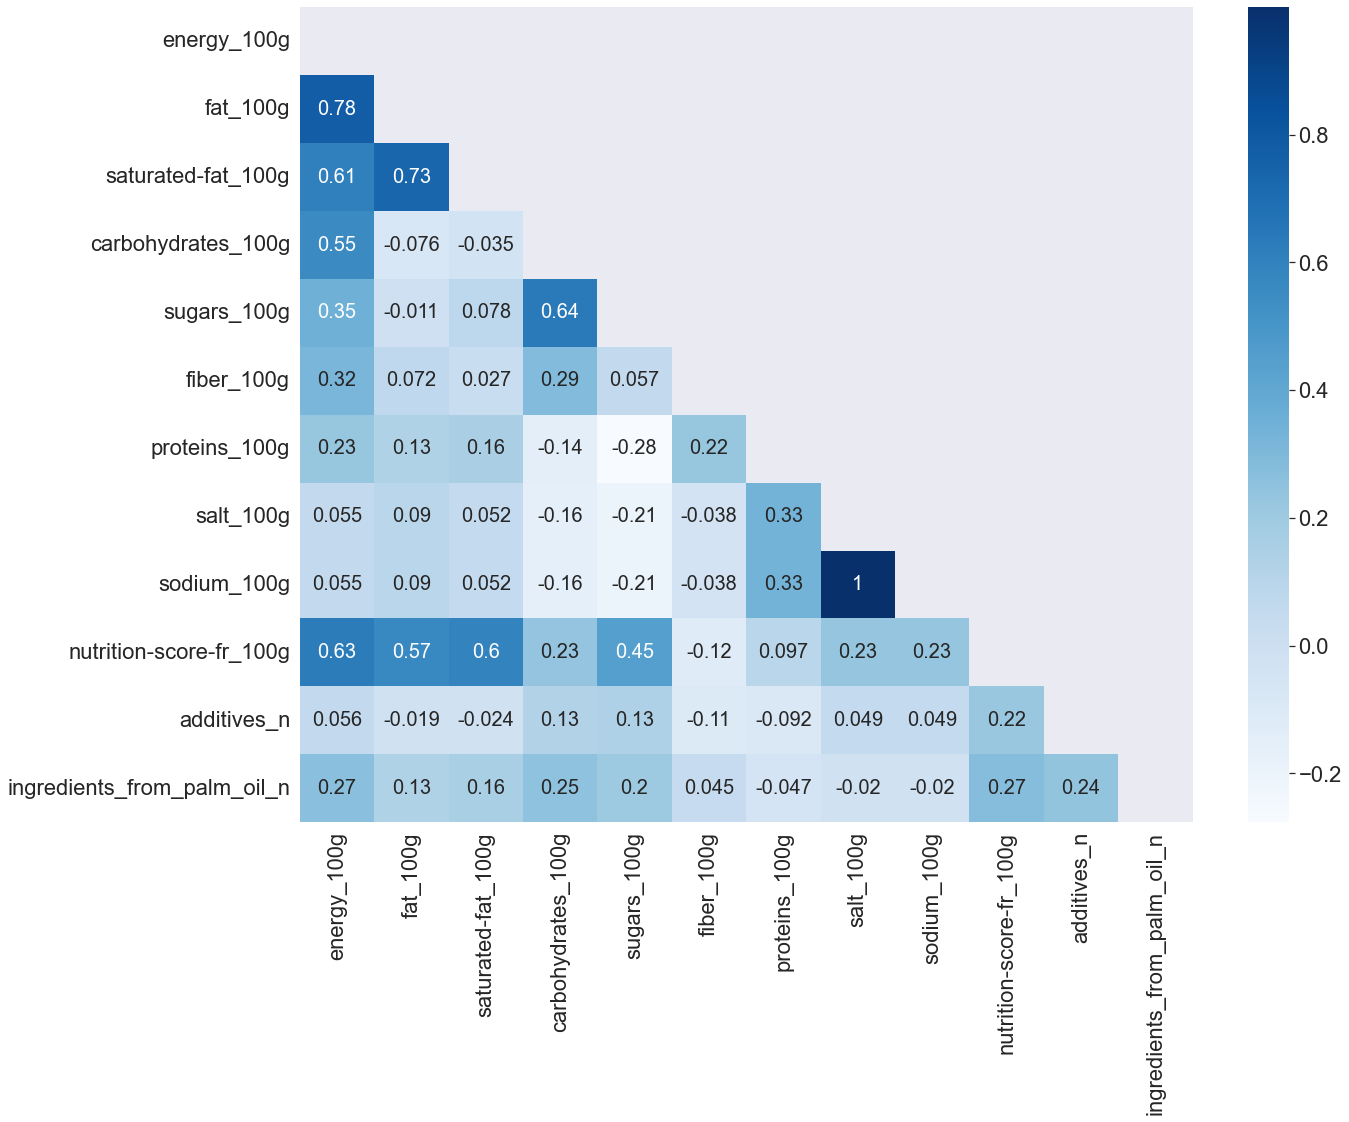

In [65]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(data_num.corr(),dtype=bool)) ## masque qui supprime la partie supérieure carré
sns.set(font_scale=2)
sns.heatmap(data_num.corr(),mask=mask,cbar= True,annot=True,annot_kws={"size": 20},cmap='Blues')
plt.savefig("Heatmap.png")


### Forte corrélation : 
- entre  fat_100g et energy_100g
- entre saturated-fat_100g et fat_100
- entre sugars_100g et carbohydrates_100g
-entre salt_100g et sodium_100g


### Traitement des valeurs manquantes

In [66]:
df1.isna().sum()

energy_100g                     9927
fat_100g                       11784
saturated-fat_100g             11326
carbohydrates_100g             12175
sugars_100g                    11262
fiber_100g                     24979
proteins_100g                   9829
salt_100g                      11214
sodium_100g                    11216
nutrition-score-fr_100g        11974
product_name                     225
code                               0
product_name                     225
additives_n                     7598
ingredients_from_palm_oil_n     7598
nutrition_grade_fr             11974
pnns_groups_1                      0
pnns_groups_2                      0
dtype: int64

####  Pour ces deux variables : "ingredients_from_palm_oil_n" , l'écart type (et donc la variance) est très faible et 75% au moins des produits ont la valeur 0. On peut donc remplacer sans trop d'incidence tous les NAN par 0 pour ces deux variables.

### On procède de la même manière pour la variable: "additives_n"  pour laquelle une grande partie des produits a la valeur 0

In [67]:
df1[["ingredients_from_palm_oil_n","additives_n"]]

,ingredients_from_palm_oil_n,additives_n
182,0.0,0.0
184,0.0,3.0
187,NaN,NaN
188,0.0,0.0
226,0.0,2.0
...,...,...
320751,NaN,NaN
320755,NaN,NaN
320758,0.0,0.0
320763,0.0,0.0


In [68]:
df1.loc[df1["ingredients_from_palm_oil_n"].isna(),"ingredients_from_palm_oil_n"]=0.0

In [69]:
df1.loc[df1["additives_n"].isna(),"additives_n"]=0.0

In [70]:
df1[["ingredients_from_palm_oil_n","additives_n"]]

,ingredients_from_palm_oil_n,additives_n
182,0.0,0.0
184,0.0,3.0
187,0.0,0.0
188,0.0,0.0
226,0.0,2.0
...,...,...
320751,0.0,0.0
320755,0.0,0.0
320758,0.0,0.0
320763,0.0,0.0


In [71]:
df1.isna().sum()

energy_100g                     9927
fat_100g                       11784
saturated-fat_100g             11326
carbohydrates_100g             12175
sugars_100g                    11262
fiber_100g                     24979
proteins_100g                   9829
salt_100g                      11214
sodium_100g                    11216
nutrition-score-fr_100g        11974
product_name                     225
code                               0
product_name                     225
additives_n                        0
ingredients_from_palm_oil_n        0
nutrition_grade_fr             11974
pnns_groups_1                      0
pnns_groups_2                      0
dtype: int64

### Pour les variables corrélées , nous pouvons utiliser IterativeImputer de sklearn

In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [73]:
# On utilise IterativeImputer pour prédire energy_100g et fat_100g
model= IterativeImputer(random_state=0)
energy_fat_predict = model.fit_transform(df1[['energy_100g','fat_100g']])
df1[['energy_100g','fat_100g']]= energy_fat_predict

In [74]:
# fat_100g et saturated-fat_100g
model= IterativeImputer(random_state=0)
fat_saturatedfat_predict = model.fit_transform(df1[['fat_100g','saturated-fat_100g']])
df1[['fat_100g','saturated-fat_100g']]= fat_saturatedfat_predict

In [75]:
# sugars_100g et carbohydrates_100g
model= IterativeImputer(random_state=0)
sugars_carbohydrates_predict = model.fit_transform(df1[['sugars_100g','carbohydrates_100g']])
df1[['sugars_100g','carbohydrates_100g']]= sugars_carbohydrates_predict

In [76]:
# sel_100g et sodium_100g
model= IterativeImputer(random_state=0)
sugars_carbohydrates_predict = model.fit_transform(df1[['salt_100g','sodium_100g']])
df1[['salt_100g','sodium_100g']]= sugars_carbohydrates_predict

#### Pour les variables numériques restantes , nous allons remplacer les Nan par les valeurs moyennes par catégorie d'aliments

In [77]:
variables_restantes = ['fiber_100g', 'proteins_100g','nutrition-score-fr_100g']


In [78]:
df1["pnns_groups_1"].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Fruits and vegetables', 'Composite foods',
       'Salty snacks', 'Fat and sauces', 'Milk and dairy products'],
      dtype=object)

In [79]:
df1[['fiber_100g', 'proteins_100g','nutrition-score-fr_100g']].groupby(by=df1['pnns_groups_1']).mean()

,fiber_100g,proteins_100g,nutrition-score-fr_100g
pnns_groups_1,,,
Beverages,0.579941,0.845284,8.145586
Cereals and potatoes,5.157427,9.928305,1.247373
Composite foods,2.091754,7.653467,3.480244
Fat and sauces,1.018885,1.876111,12.316946
Fish Meat Eggs,0.677923,18.783483,9.581108
Fruits and vegetables,2.975051,2.320006,-2.965789
Milk and dairy products,0.401396,9.922941,8.494970
Salty snacks,4.667453,10.384009,13.030285
Sugary snacks,3.371664,5.402290,17.426749


In [80]:
df1["fiber_100g"].groupby(by=df1['pnns_groups_1']).mean()

pnns_groups_1
Beverages                  0.579941
Cereals and potatoes       5.157427
Composite foods            2.091754
Fat and sauces             1.018885
Fish Meat Eggs             0.677923
Fruits and vegetables      2.975051
Milk and dairy products    0.401396
Salty snacks               4.667453
Sugary snacks              3.371664
Name: fiber_100g, dtype: float64

In [81]:
df1["fiber_100g"].groupby(by=df1['pnns_groups_1']).mean()['Beverages']

0.5799406931046802

In [82]:
df1["fiber_100g"].groupby(by=df1['pnns_groups_1']).mean().index

Index(['Beverages', 'Cereals and potatoes', 'Composite foods',
       'Fat and sauces', 'Fish Meat Eggs', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Sugary snacks'],
      dtype='object', name='pnns_groups_1')

In [83]:
categories = list(df1['pnns_groups_1'].unique())
categories

['Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Composite foods',
 'Salty snacks',
 'Fat and sauces',
 'Milk and dairy products']

In [84]:
for cat in categories:
    df1.loc[(df1["pnns_groups_1"]== cat ) & (df1["fiber_100g"].isna()) ,"fiber_100g"]= df1["fiber_100g"].groupby(by=df1['pnns_groups_1']).mean()[cat]
    

In [85]:
df1.isna().sum()

energy_100g                        0
fat_100g                           0
saturated-fat_100g                 0
carbohydrates_100g                 0
sugars_100g                        0
fiber_100g                         0
proteins_100g                   9829
salt_100g                          0
sodium_100g                        0
nutrition-score-fr_100g        11974
product_name                     225
code                               0
product_name                     225
additives_n                        0
ingredients_from_palm_oil_n        0
nutrition_grade_fr             11974
pnns_groups_1                      0
pnns_groups_2                      0
dtype: int64

### On traite de la même façon les valeurs manquantes de 'proteins_100g', 'salt_100g' et 'nutrition-score-fr_100g'

In [86]:
for cat in categories:
    df1.loc[(df1["pnns_groups_1"]== cat ) & (df1["proteins_100g"].isna()) ,"proteins_100g"]= df1["proteins_100g"].groupby(by=df1['pnns_groups_1']).mean()[cat]
    df1.loc[(df1["pnns_groups_1"]== cat ) & (df1["nutrition-score-fr_100g"].isna()) ,"nutrition-score-fr_100g"]= df1["nutrition-score-fr_100g"].groupby(by=df1['pnns_groups_1']).mean()[cat]

In [87]:
df1.isna().sum()

energy_100g                        0
fat_100g                           0
saturated-fat_100g                 0
carbohydrates_100g                 0
sugars_100g                        0
fiber_100g                         0
proteins_100g                      0
salt_100g                          0
sodium_100g                        0
nutrition-score-fr_100g            0
product_name                     225
code                               0
product_name                     225
additives_n                        0
ingredients_from_palm_oil_n        0
nutrition_grade_fr             11974
pnns_groups_1                      0
pnns_groups_2                      0
dtype: int64

In [88]:
df1.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n
count,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000
mean,1087.085688,13.241233,5.279283,26.957613,12.510905,2.201304,7.637921,0.875458,0.344670,8.242390,1.631909,0.055955
std,718.741569,15.515594,7.404782,24.161940,16.325018,2.829555,7.198142,1.291605,0.508542,8.429918,2.501071,0.233482
min,0.000000,-5.968792,-1.418260,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000023,-15.000000,0.000000,0.000000
25%,485.000000,1.900000,0.500000,6.200000,1.500000,0.579941,1.876111,0.120000,0.047244,1.247373,0.000000,0.000000
50%,1087.085688,12.000000,3.235924,25.300000,7.800000,1.300000,5.800000,0.875458,0.344670,8.494970,0.000000,0.000000
75%,1510.000000,17.000000,5.279283,42.000000,12.510905,3.371664,10.400000,1.000000,0.393701,14.000000,2.000000,0.000000
max,4377.014179,100.000000,100.000000,113.080132,100.000000,86.200000,86.000000,74.000000,29.133858,40.000000,31.000000,2.000000


* Aprés l'impultation des données on a des valeurs abérantes qui apparaissent et ca due a l'impultation

In [89]:
# On procéde la meme etape que la prmiere en gardons que mes données sup a 100 et inf a 0:

# supprimer les lignes de nuttriments qui sont supprieur au sieul:
df2 = df1[~((df1[g_per_100g]> 100)|(df1[g_per_100g]< 0)).any(axis = 1)]

In [90]:
df2.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n
count,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000
mean,1104.107408,13.542510,5.378621,27.017487,12.543500,2.234925,7.767442,0.886086,0.348854,8.305565,1.657369,0.057054
std,714.244848,15.500936,7.439502,24.260601,16.297473,2.843880,7.203001,1.278268,0.503292,8.447630,2.513717,0.235630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,512.000000,2.000000,0.500000,6.000000,1.500000,0.579941,1.876111,0.127000,0.050000,1.247373,0.000000,0.000000
50%,1087.085688,12.277739,3.500000,26.000000,7.700000,1.400000,6.000000,0.875458,0.344670,8.494970,0.000000,0.000000
75%,1518.000000,17.300000,5.404422,43.000000,12.510905,3.371664,10.800000,1.000000,0.393701,14.000000,2.000000,0.000000
max,4377.014179,100.000000,100.000000,100.000000,100.000000,86.200000,86.000000,74.000000,29.133858,40.000000,31.000000,2.000000


In [91]:
data_final = df2.copy()

In [92]:
data_final.to_csv("C:/Users/Lynda/Desktop/Concevez une application au service de la santé publique_HADJEMI_Lynda/data_finale.csv",index=False)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48796 entries, 182 to 320765
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   energy_100g                  48796 non-null  float64
 1   fat_100g                     48796 non-null  float64
 2   saturated-fat_100g           48796 non-null  float64
 3   carbohydrates_100g           48796 non-null  float64
 4   sugars_100g                  48796 non-null  float64
 5   fiber_100g                   48796 non-null  float64
 6   proteins_100g                48796 non-null  float64
 7   salt_100g                    48796 non-null  float64
 8   sodium_100g                  48796 non-null  float64
 9   nutrition-score-fr_100g      48796 non-null  float64
 10  product_name                 48575 non-null  object 
 11  code                         48796 non-null  object 
 12  product_name                 48575 non-null  object 
 13  additives_n  